In [1]:
import pandas as pd

## IV Toxicity classification

### 1. Use prompting to create a toxicity classifier that classifies each post from 1 (not) to 5 (toxic). Report all your prompts (from the one your started to the one you ended up with) as a PDF named prompts.pdf.

### 2. Use your prompting classifier to annotate for toxicity scale each crawled post. (Hint: you are allowed to use prompting for a sample that you will use to train a scikit classifier.) The submitted crawl.csv should comprise these annotations.

In [2]:
df = pd.read_csv("crawl.csv")
df

,Unnamed: 0,title,comment,date,language
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other
...,...,...,...,...,...
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el
1027,1028,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",αυτό το Δεν επηρεάζει ο Ηλιος το Κλίμα εεεεχμμ...,9 hours ago,el


In [3]:
'''df = df["comment"]
df.to_csv("df.txt",index=True)'''

'df = df["comment"]\ndf.to_csv("df.txt",index=True)'

In [4]:
annotations = pd.read_excel("annotations.xlsx")
annotations

,comment,toxicity_rank
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
1024,1024,1
1025,1025,1
1026,1026,1
1027,1027,1


In [5]:
annotations.drop(axis=1,columns=["comment"],inplace=True)
annotations

,toxicity_rank
0,1
1,1
2,1
3,1
4,1
...,...
1024,1
1025,1
1026,1
1027,1


In [6]:
df_new = df.join(annotations)
df_new.dropna(inplace=True)
df_new

,Unnamed: 0,title,comment,date,language,toxicity_rank
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other,1
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el,1
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other,1
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other,1
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other,1
...,...,...,...,...,...,...
1023,1024,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Ευχαριστούμε κύριε Σαχίνη\nΠάντα τέτοιους καλε...,8 hours ago,other,1
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other,1
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el,1
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el,1


In [7]:
df_new["toxicity_rank"] = df_new["toxicity_rank"].astype(int)
df_new

,Unnamed: 0,title,comment,date,language,toxicity_rank
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other,1
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el,1
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other,1
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other,1
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other,1
...,...,...,...,...,...,...
1023,1024,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Ευχαριστούμε κύριε Σαχίνη\nΠάντα τέτοιους καλε...,8 hours ago,other,1
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other,1
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el,1
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el,1


In [8]:
df_new["toxicity_rank"].value_counts()

1    862
2     82
3     42
5     23
4     18
Name: toxicity_rank, dtype: int64

### 3. Report (in report.pdf): (a) the most toxic language, (b) the page with the more/highest rate of toxic posts, (c) the page where toxicity is uniform over time, (d) the page where toxicity increases over time.

In [9]:
greek_tox = df_new[df_new["language"] == 'el']["toxicity_rank"].mean()
english_tox = df_new[df_new["language"] == 'en']["toxicity_rank"].mean()
other_tox = df_new[df_new["language"] == 'other']["toxicity_rank"].mean()

In [10]:
print(f"Greek mean toxicity rank: {greek_tox}")
print(f"English mean toxicity rank: {english_tox}")
print(f"Other language mean toxicity rank: {other_tox}")

Greek mean toxicity rank: 1.2693156732891833
English mean toxicity rank: 1.625
Other language mean toxicity rank: 1.5523809523809524


In [11]:
def is_toxic(rank):
    if rank>=3:
        return 1
    else:
        return 0

In [12]:
df_new["is_toxic"] = df_new["toxicity_rank"].apply(is_toxic)
df_new

,Unnamed: 0,title,comment,date,language,toxicity_rank,is_toxic
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other,1,0
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el,1,0
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other,1,0
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other,1,0
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other,1,0
...,...,...,...,...,...,...,...
1023,1024,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Ευχαριστούμε κύριε Σαχίνη\nΠάντα τέτοιους καλε...,8 hours ago,other,1,0
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other,1,0
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el,1,0
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el,1,0


In [13]:
grouped_df = df_new.groupby('title').agg({'comment': 'count', 'is_toxic': 'sum'}).reset_index()
grouped_df["toxic_comment_rate"] = grouped_df["is_toxic"]/grouped_df["comment"]
grouped_df

,title,comment,is_toxic,toxic_comment_rate
0,2. Θεωρίες συνωμοσίας και επίπεδη Γη | SciTalk...,100,1,0.010000
1,21+ Slotshub Live 57 BONUS OPENING! | SONOFZEU...,1,0,0.000000
2,"5.000 εξωπλανήτες, αστέρας Earendel, η αναγκαι...",2,1,0.500000
3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,4,1,0.250000
4,Όλγα Μαλανδράκη : Η Χανιώτισσα Επιστήμονας που...,8,3,0.375000
5,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,2,0,0.000000
6,Αιγαίο - Ανατολική Μεσόγειος και Αποκαλύψεις -...,100,12,0.120000
7,Β. Φούσκας : Μ. Ανατολή- Η ηγεμονία των ΗΠΑ στ...,34,7,0.205882
8,Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTIC...,26,6,0.230769
9,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",7,0,0.000000


In [14]:
top_5_comment_count = grouped_df.nlargest(5, 'toxic_comment_rate')

In [15]:
top_5_comment_count

,title,comment,is_toxic,toxic_comment_rate
10,Δυνατό PICK! - YouTube,1,1,1.000
2,"5.000 εξωπλανήτες, αστέρας Earendel, η αναγκαι...",2,1,0.500
4,Όλγα Μαλανδράκη : Η Χανιώτισσα Επιστήμονας που...,8,3,0.375
12,"Η Συνέχεια του Λαϊκού Πολιτισμού, Αντιπρόταγμ...",80,24,0.300
3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,4,1,0.250


In [16]:
grouped2_df = df_new.groupby('title').agg({'comment': 'count','toxicity_rank': 'std'}).reset_index()
grouped2_df

,title,comment,toxicity_rank
0,2. Θεωρίες συνωμοσίας και επίπεδη Γη | SciTalk...,100,0.200000
1,21+ Slotshub Live 57 BONUS OPENING! | SONOFZEU...,1,NaN
2,"5.000 εξωπλανήτες, αστέρας Earendel, η αναγκαι...",2,1.414214
3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,4,1.500000
4,Όλγα Μαλανδράκη : Η Χανιώτισσα Επιστήμονας που...,8,1.832251
5,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,2,0.000000
6,Αιγαίο - Ανατολική Μεσόγειος και Αποκαλύψεις -...,100,0.989847
7,Β. Φούσκας : Μ. Ανατολή- Η ηγεμονία των ΗΠΑ στ...,34,1.073502
8,Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTIC...,26,1.134087
9,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",7,0.000000


In [17]:
top_5_comment_count = grouped2_df.nsmallest(5, 'toxicity_rank')

In [18]:
top_5_comment_count

,title,comment,toxicity_rank
5,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,2,0.0
9,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",7,0.0
13,Κεντρικό δελτίο ειδήσεων 28/11/2023 | OPEN TV ...,4,0.0
18,"Ταξίδια στον Χωροχρόνο (ft. Δρ Γιώργος Παππάς,...",100,0.1
0,2. Θεωρίες συνωμοσίας και επίπεδη Γη | SciTalk...,100,0.2


In [19]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [20]:
def convert_to_timedelta(value):
    if 'day' in value:
        return timedelta(days=int(value.split()[0]))
    elif 'hour' in value:
        return timedelta(hours=int(value.split()[0]))
    elif 'month' in value:
        return relativedelta(months=-int(value.split()[0]))
    elif 'year' in value:
        return timedelta(days=int(value.split()[0]) * 365)
    else:
        return timedelta(0)

In [21]:
df_new['timedelta'] = df_new['date'].apply(convert_to_timedelta)
df_new['time_ago'] = datetime.now() - df_new['timedelta']
df_new

,Unnamed: 0,title,comment,date,language,toxicity_rank,is_toxic,timedelta,time_ago
0,0,ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - Y...,Domizerahansera locoananera,4 months ago,other,1,0,relativedelta(months=-4),2024-03-29 13:07:16.631179
1,1,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,μλκ τι εκανες εκει με Nida ρε παιχτη Αυτα τα ...,6 months ago (edited),el,1,0,relativedelta(months=-6),2024-05-29 13:07:16.631179
2,2,Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube,Ο λιλ ποπ ειναι αυτος,6 months ago,other,1,0,relativedelta(months=-6),2024-05-29 13:07:16.631179
3,3,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,wlg epilipsy confirmed,1 year ago,other,1,0,"365 days, 0:00:00",2022-11-29 13:07:16.631179
4,4,Adapting στο game = PERMA ΚΑΛΟΣ - YouTube,RRRRRRRRRRRRRRRRRRRRRR,1 year ago,other,1,0,"365 days, 0:00:00",2022-11-29 13:07:16.631179
...,...,...,...,...,...,...,...,...,...
1023,1024,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Ευχαριστούμε κύριε Σαχίνη\nΠάντα τέτοιους καλε...,8 hours ago,other,1,0,8:00:00,2023-11-29 05:07:16.631179
1024,1025,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Εξαιρετικη,11 hours ago,other,1,0,11:00:00,2023-11-29 02:07:16.631179
1025,1026,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Δεν υπάρχουν πολλά τέτοια προστατευμενα σημεια...,6 hours ago,el,1,0,6:00:00,2023-11-29 07:07:16.631179
1026,1027,"Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ, η ...",Κύριε Σαχίνη θα ήταν ωραία καλεσμένη στις αντ...,8 hours ago,el,1,0,8:00:00,2023-11-29 05:07:16.631179


In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1027
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     1027 non-null   int64         
 1   title          1027 non-null   object        
 2   comment        1027 non-null   object        
 3   date           1027 non-null   object        
 4   language       1027 non-null   object        
 5   toxicity_rank  1027 non-null   int32         
 6   is_toxic       1027 non-null   int64         
 7   timedelta      1027 non-null   object        
 8   time_ago       1027 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 76.2+ KB


ΕΚΑΝΕ ΤΟ ΚΑΛΥΤΕΡΟ NIDALEE GAME! | Dom1nant - YouTube


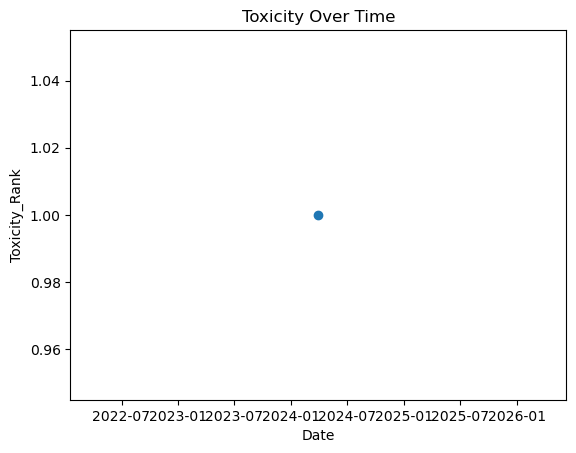

Όταν έχεις συμπαίκτη είναι πιο EASY! - YouTube


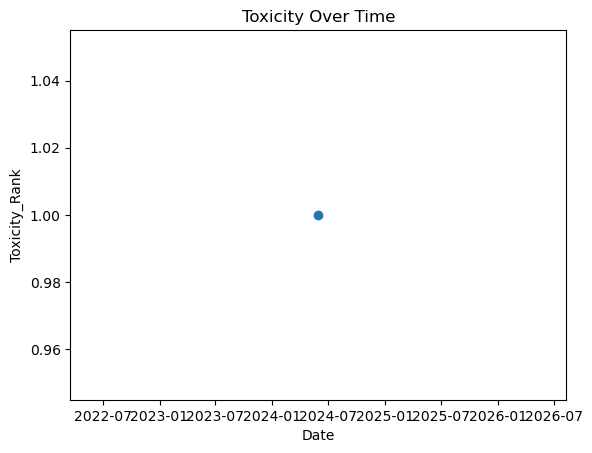

Adapting στο game = PERMA ΚΑΛΟΣ - YouTube


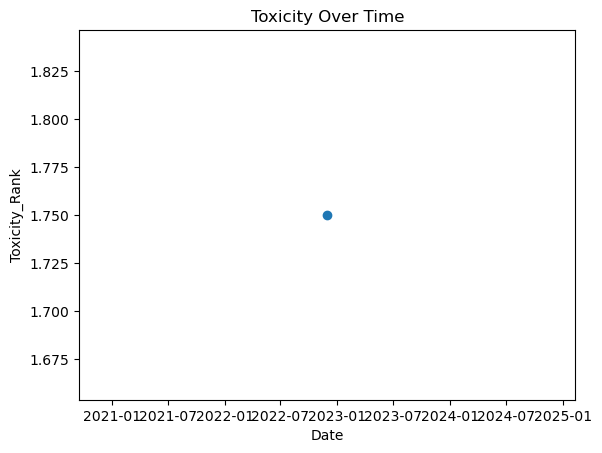

Δυνατό PICK! - YouTube


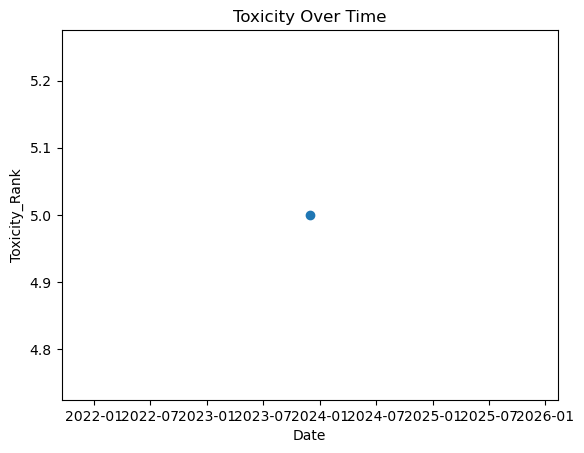

21+ Slotshub Live 57 BONUS OPENING! | SONOFZEUS ΑΓΟΡΑΣΤΑ ΓΙΑ MAX WIN! - YouTube


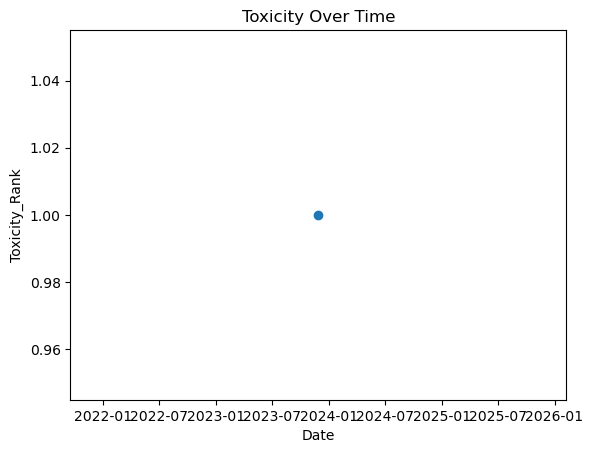

Κεντρικό δελτίο ειδήσεων 28/11/2023 | OPEN TV - YouTube


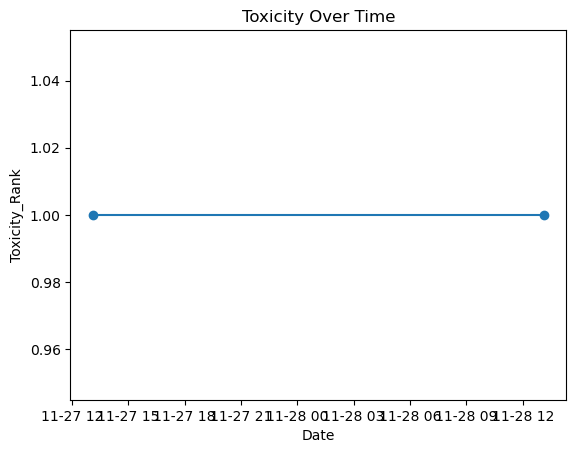

Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTICA TV - YouTube


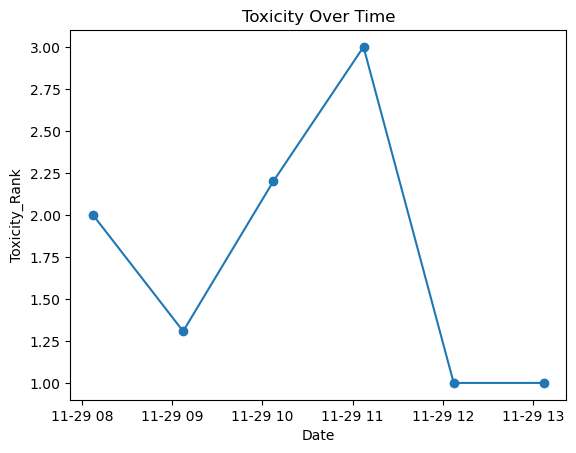

5.000 εξωπλανήτες, αστέρας Earendel, η αναγκαιότητα ένωσης της ανθρωπότητας | Astronio Live (#15) - YouTube


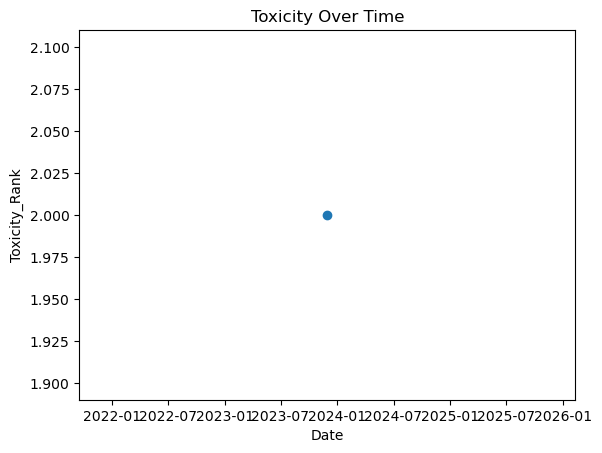

Τι συνέπειες θα είχε η ανακάλυψη εξωγήινης ζωής για την ανθρωπότητα; | Astronio Live (#16) - YouTube


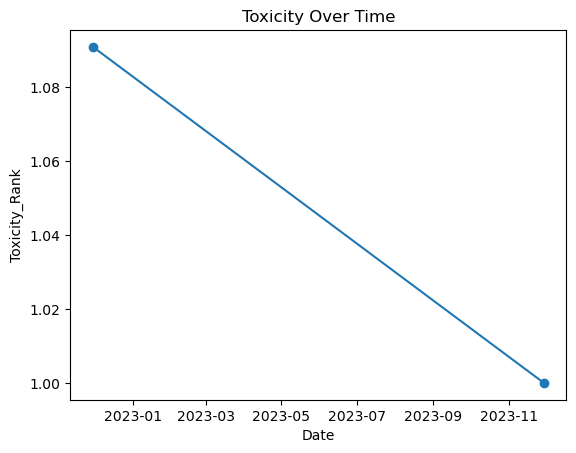

Ο Δημήτρης Νανόπουλος στο Astronio | Astronio Live (#9) - YouTube


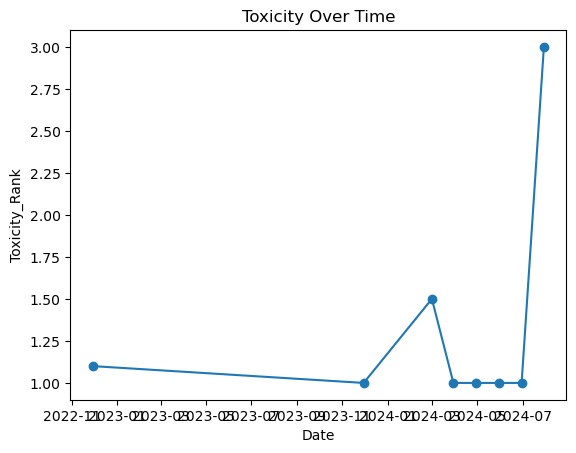

2. Θεωρίες συνωμοσίας και επίπεδη Γη | SciTalksGR - YouTube


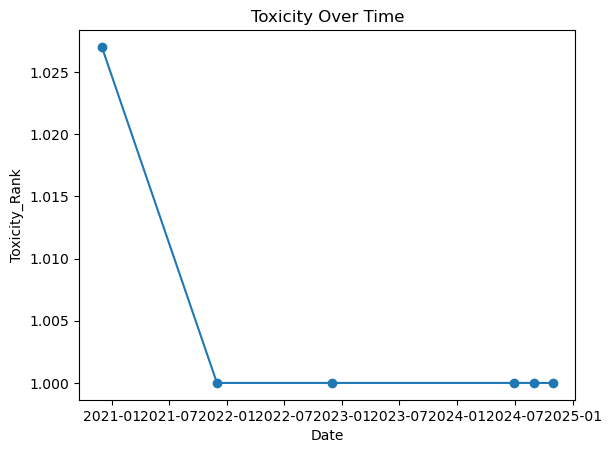

Το μέλλον της ανθρωπότητας στο διάστημα (ft. Διονύσης Σιμόπουλος) | Astronio Live (#3) - YouTube


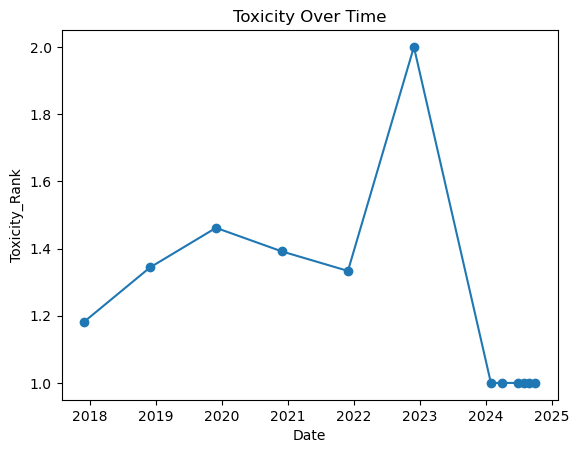

Ταξίδια στον Χωροχρόνο (ft. Δρ Γιώργος Παππάς, Δρ Κοσμάς Γαζέας) | Astronio Live (#2) - YouTube


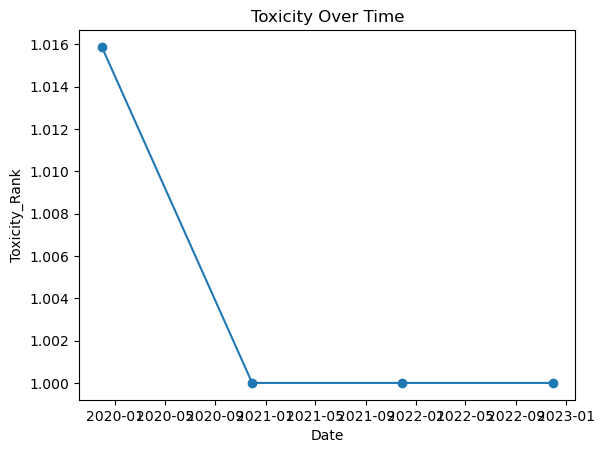

Σε ποιον ανήκει το διάστημα; (ft. Υβόννη Βασταρούχα και Dr Ελένη Βαρδουλάκη) | Astronio Live (#1) - YouTube


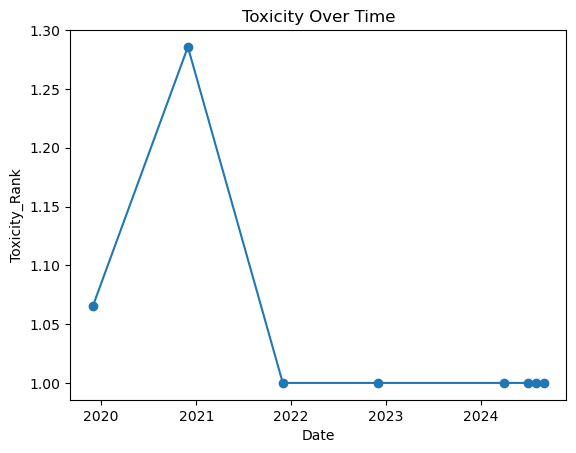

Το AI αλλάζει τα πάντα  | Astronio Live (#24) - YouTube


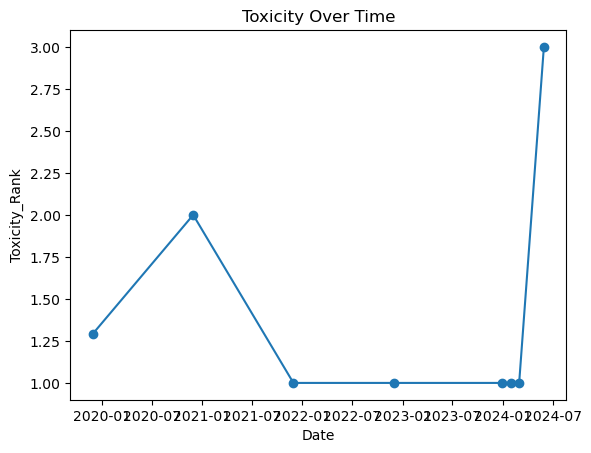

Αιγαίο - Ανατολική Μεσόγειος και Αποκαλύψεις - YouTube


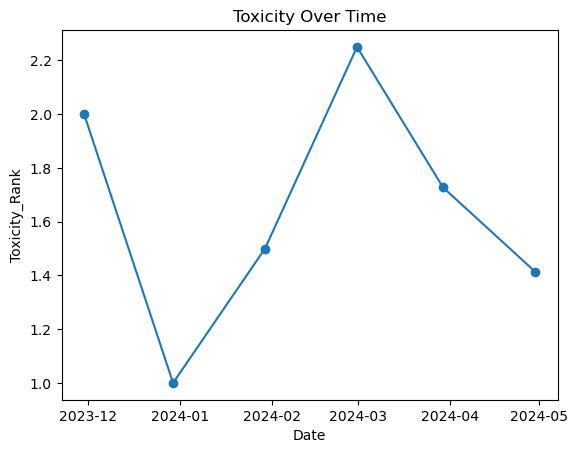

Η Συνέχεια του  Λαϊκού Πολιτισμού, Αντιπρόταγμα στηv Παγκόσμια Ομογενοποίηση - YouTube


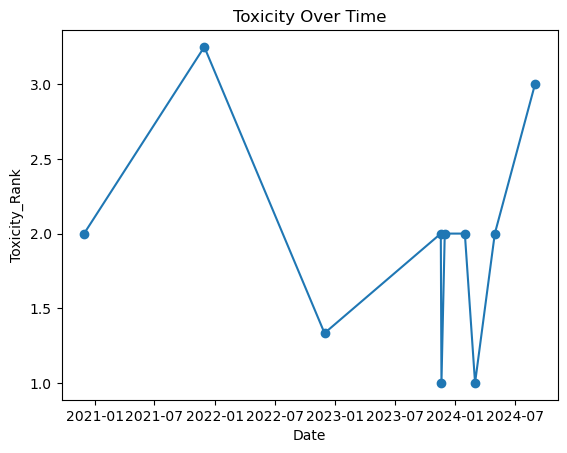

Στ. Σταυρόπουλος : Στο καιρό του ιδιότυπου τεχνο-φασισμού και του διπλού προσωπείου του συστήματος - YouTube


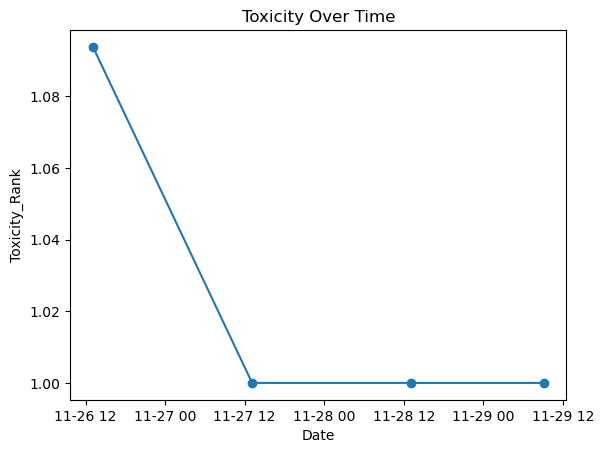

Β. Φούσκας : Μ. Ανατολή- Η ηγεμονία των ΗΠΑ στην Ευρώπη και το φοβικό σύνδρομο έναντι της Τουρκίας - YouTube


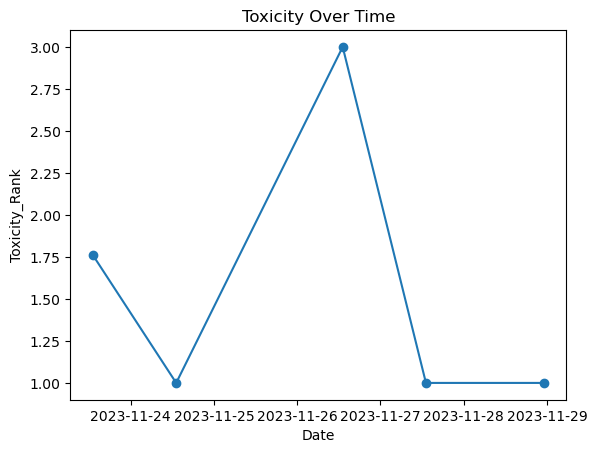

Μ. Παναγιωτάκης: Παρέμβαση στη χονδρική αγορά ενέργειας κι όχι στα χρωματιστά τρικ - YouTube


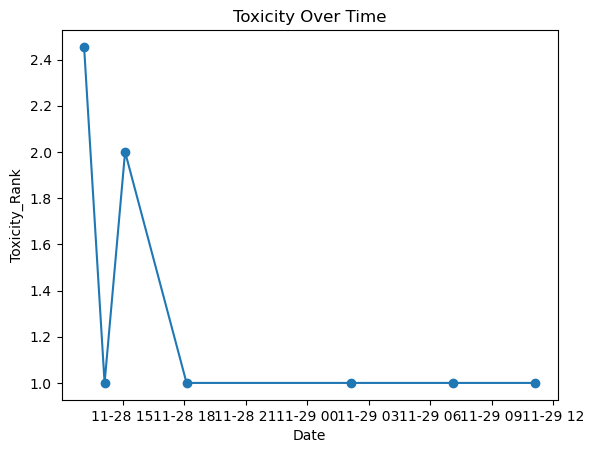

Όλγα Μαλανδράκη : Η Χανιώτισσα Επιστήμονας που "Αγγίζει" τα μυστήρια του ήλιου - YouTube


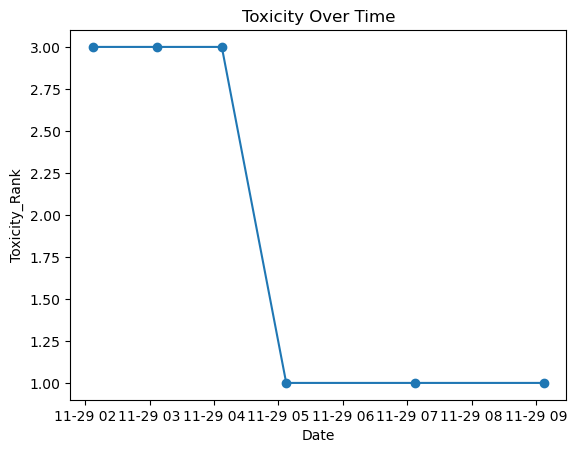

Δημ. Δαββέτας : Ο Ναπολέων, η ταινία Σκοτ,  η αποσιώπηση του πατρός και η Ευρώπη - YouTube


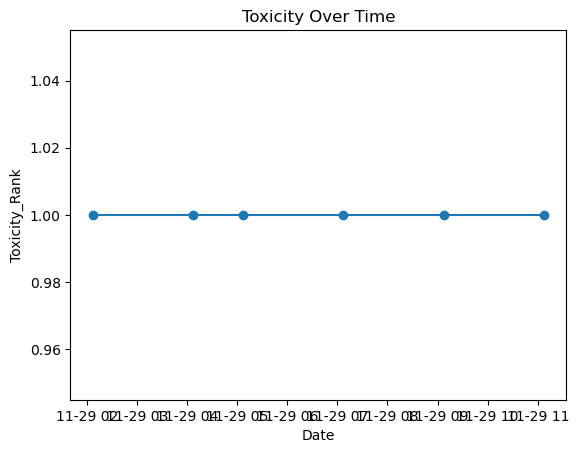

In [29]:
import matplotlib.pyplot as plt
for video in df_new["title"].unique():
    sub_df = df_new[df_new["title"]==video]
    result_df = sub_df.groupby('time_ago')['toxicity_rank'].mean().reset_index()
    print(video)
    plt.plot(result_df['time_ago'], result_df['toxicity_rank'], marker='o')
    plt.xlabel('Date')
    plt.ylabel('Toxicity_Rank')
    plt.title('Toxicity Over Time')
    plt.show()

Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTICA TV - YouTube


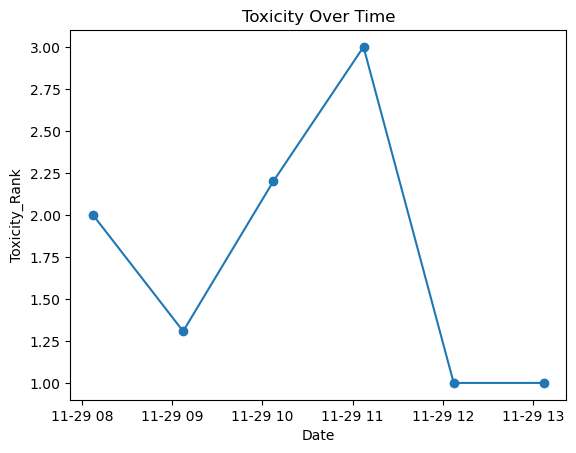

In [31]:
sub_df = df_new[df_new["title"]=="Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTICA TV - YouTube"]
result_df = sub_df.groupby('time_ago')['toxicity_rank'].mean().reset_index()
print("Δελτίο Ειδήσεων ATTICA TV - 28/11/2023 | ATTICA TV - YouTube")
plt.plot(result_df['time_ago'], result_df['toxicity_rank'], marker='o')
plt.xlabel('Date')
plt.ylabel('Toxicity_Rank')
plt.title('Toxicity Over Time')
plt.show()